IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# for styling
plt.style.use('seaborn-whitegrid')

IMPORTING DATASET

In [3]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
cat = df.select_dtypes(include=object)
cat_columns = cat.columns
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [6]:
for features in cat_columns:
    print('The feature is {} and number of categories are {}'.format(features, len(df[features].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is y and number of categories are 2


In [7]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']

In [8]:
cont = df.select_dtypes(include=np.number)
cont_columns = cont.columns
cont_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [9]:
cont_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

OUTLIER AND IQR

In [10]:
Q1 = np.percentile(df['age'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['age'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['age'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['age'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([29158, 29261, 29263, 29322, 29865, 30225, 30264, 30908, 31051,
       31052, 31055, 31057, 31069, 31077, 31089, 31099, 31101, 31108,
       31116, 31125, 31130, 31145, 31149, 31151, 31183, 31189, 31233,
       31255, 31261, 31285, 31341, 31365, 31383, 31393, 31395, 31414,
       31447, 31527, 31569, 31647, 31723, 31816, 32009, 32032, 32064,
       32068, 32074, 32089, 32105, 32160, 32204, 32321, 32451, 32689,
       32699, 32802, 33017, 33360, 33414, 33455, 33699, 33706, 33710,
       33719, 33729, 33751, 33752, 33766, 33775, 33777, 33780, 33803,
       33810, 33811, 33815, 33827, 33846, 33860, 34128, 40363, 40367,
       40368, 40374, 40381, 40383, 40389, 40401, 40402, 40412, 40471,
       40481, 40515, 40524, 40526, 40538, 40561, 40569, 40571, 40584,
       40586, 40595, 40621, 40645, 40655, 40657, 40674, 40676, 40688,
       40699, 40702, 40710, 40712, 40726, 40732, 40759, 40766, 40786,
       40789, 40792, 40816, 40837, 40838, 40843, 40

In [11]:
Q1 = np.percentile(df['balance'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['balance'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['balance'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['balance'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([   34,    65,    69, ..., 45185, 45191, 45208], dtype=int64),) (array([ 1896,  7413,  7756, 11655, 12909, 13687, 13708, 14434, 15682,
       17159, 18573, 20317, 25119, 25240, 31509, 32713, 38736],
      dtype=int64),)


In [12]:
Q1 = np.percentile(df['day'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['day'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)  
 
# Upper bound
upper = np.where(df['day'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['day'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([], dtype=int64),) (array([], dtype=int64),)


In [13]:
Q1 = np.percentile(df['duration'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['duration'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)  
 
# Upper bound
upper = np.where(df['duration'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['duration'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([   37,    43,    53, ..., 45200, 45206, 45208], dtype=int64),) (array([], dtype=int64),)


In [14]:
Q1 = np.percentile(df['campaign'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['campaign'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)  
 
# Upper bound
upper = np.where(df['campaign'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['campaign'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([  706,   758,   780, ..., 44891, 45015, 45056], dtype=int64),) (array([], dtype=int64),)


In [15]:
Q1 = np.percentile(df['pdays'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['pdays'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)  
 
# Upper bound
upper = np.where(df['pdays'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['pdays'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([    0,     1,     2, ..., 45208, 45209, 45210], dtype=int64),) (array([    0,     1,     2, ..., 45206, 45207, 45209], dtype=int64),)


In [16]:
Q1 = np.percentile(df['previous'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['previous'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)  
 
# Upper bound
upper = np.where(df['previous'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['previous'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (45211, 17)
Outliers are: (array([    0,     1,     2, ..., 45208, 45209, 45210], dtype=int64),) (array([    0,     1,     2, ..., 45206, 45207, 45209], dtype=int64),)


EXPLOTARY DATA ANALYSIS

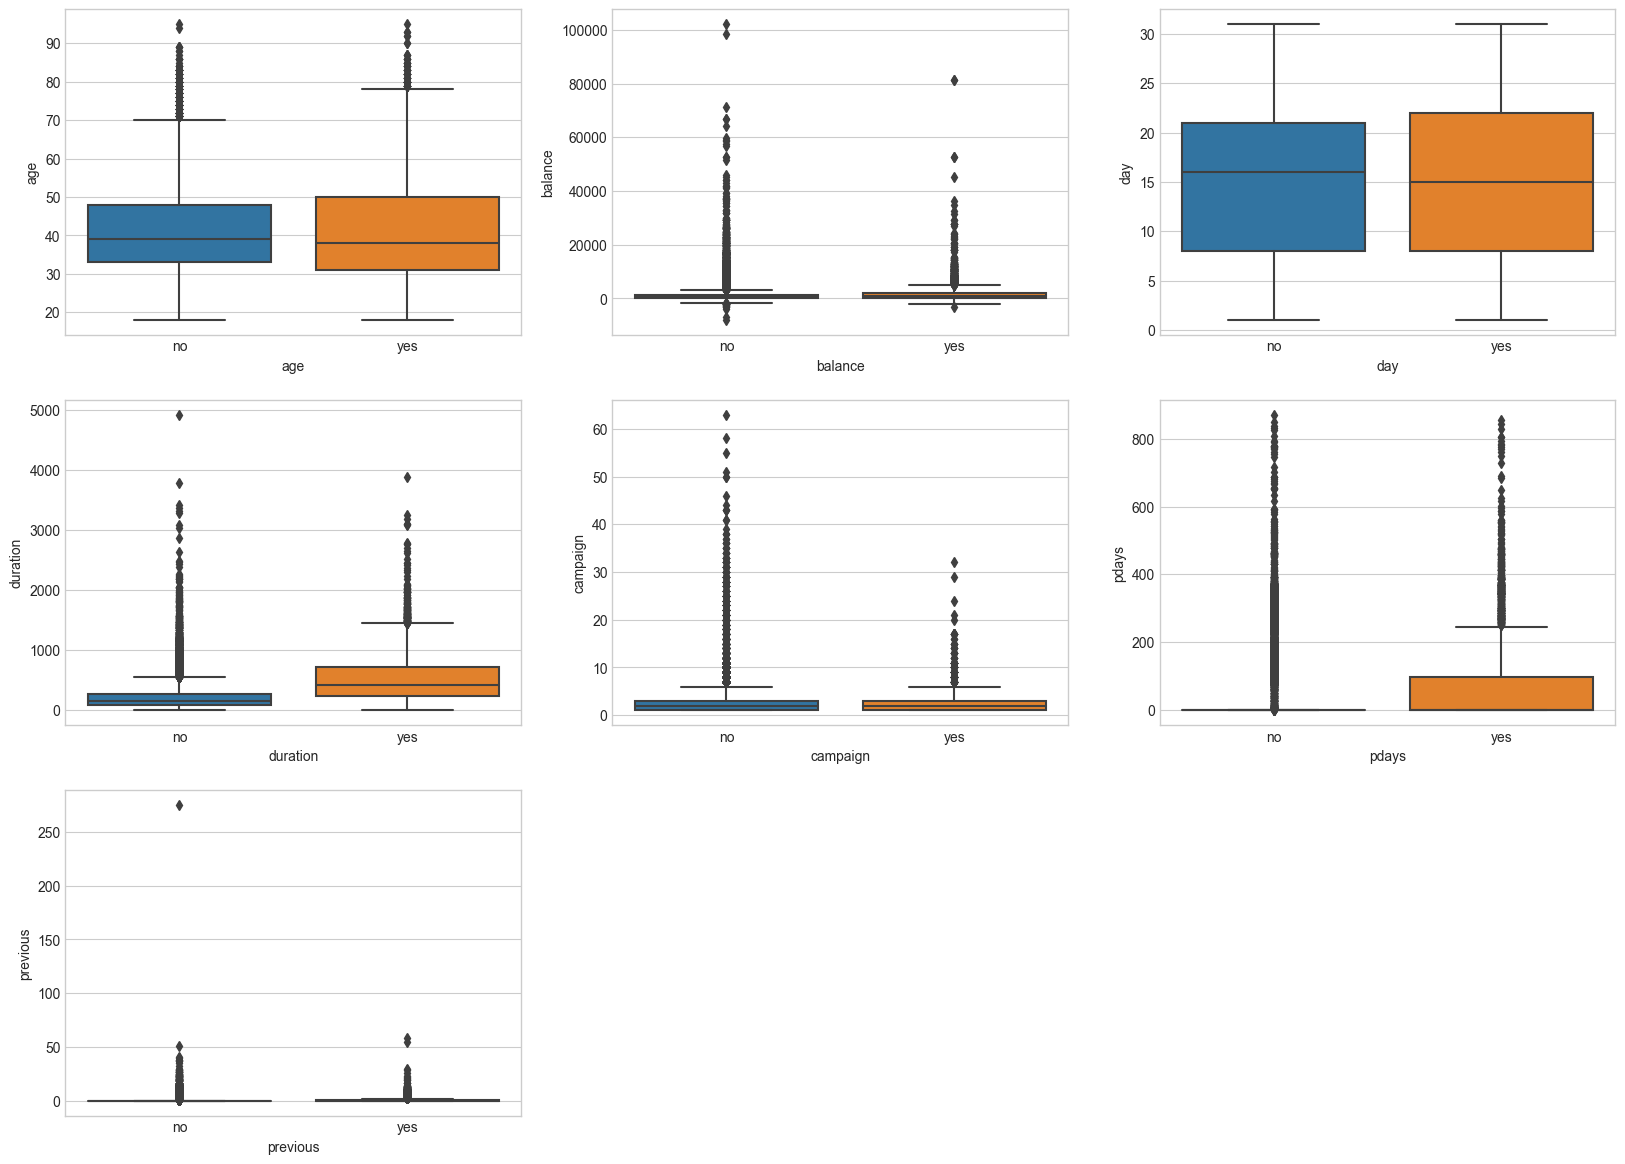

In [17]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in cont_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

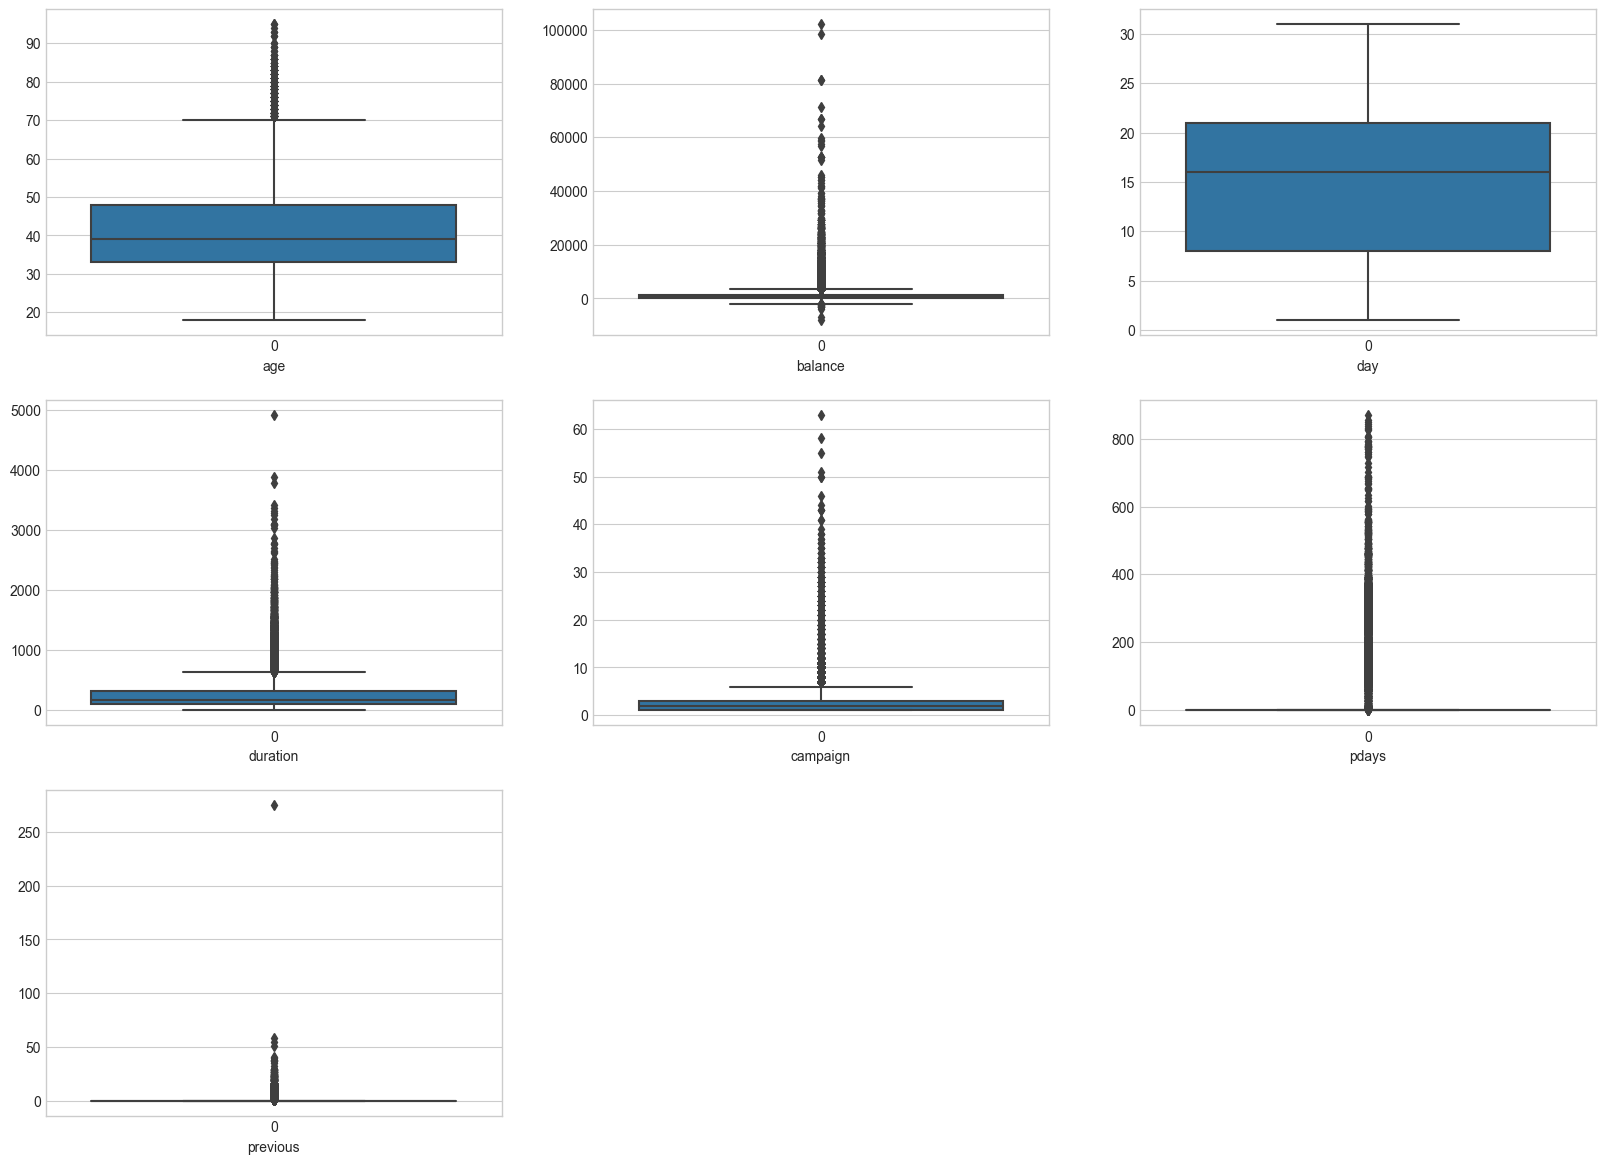

In [18]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in cont_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

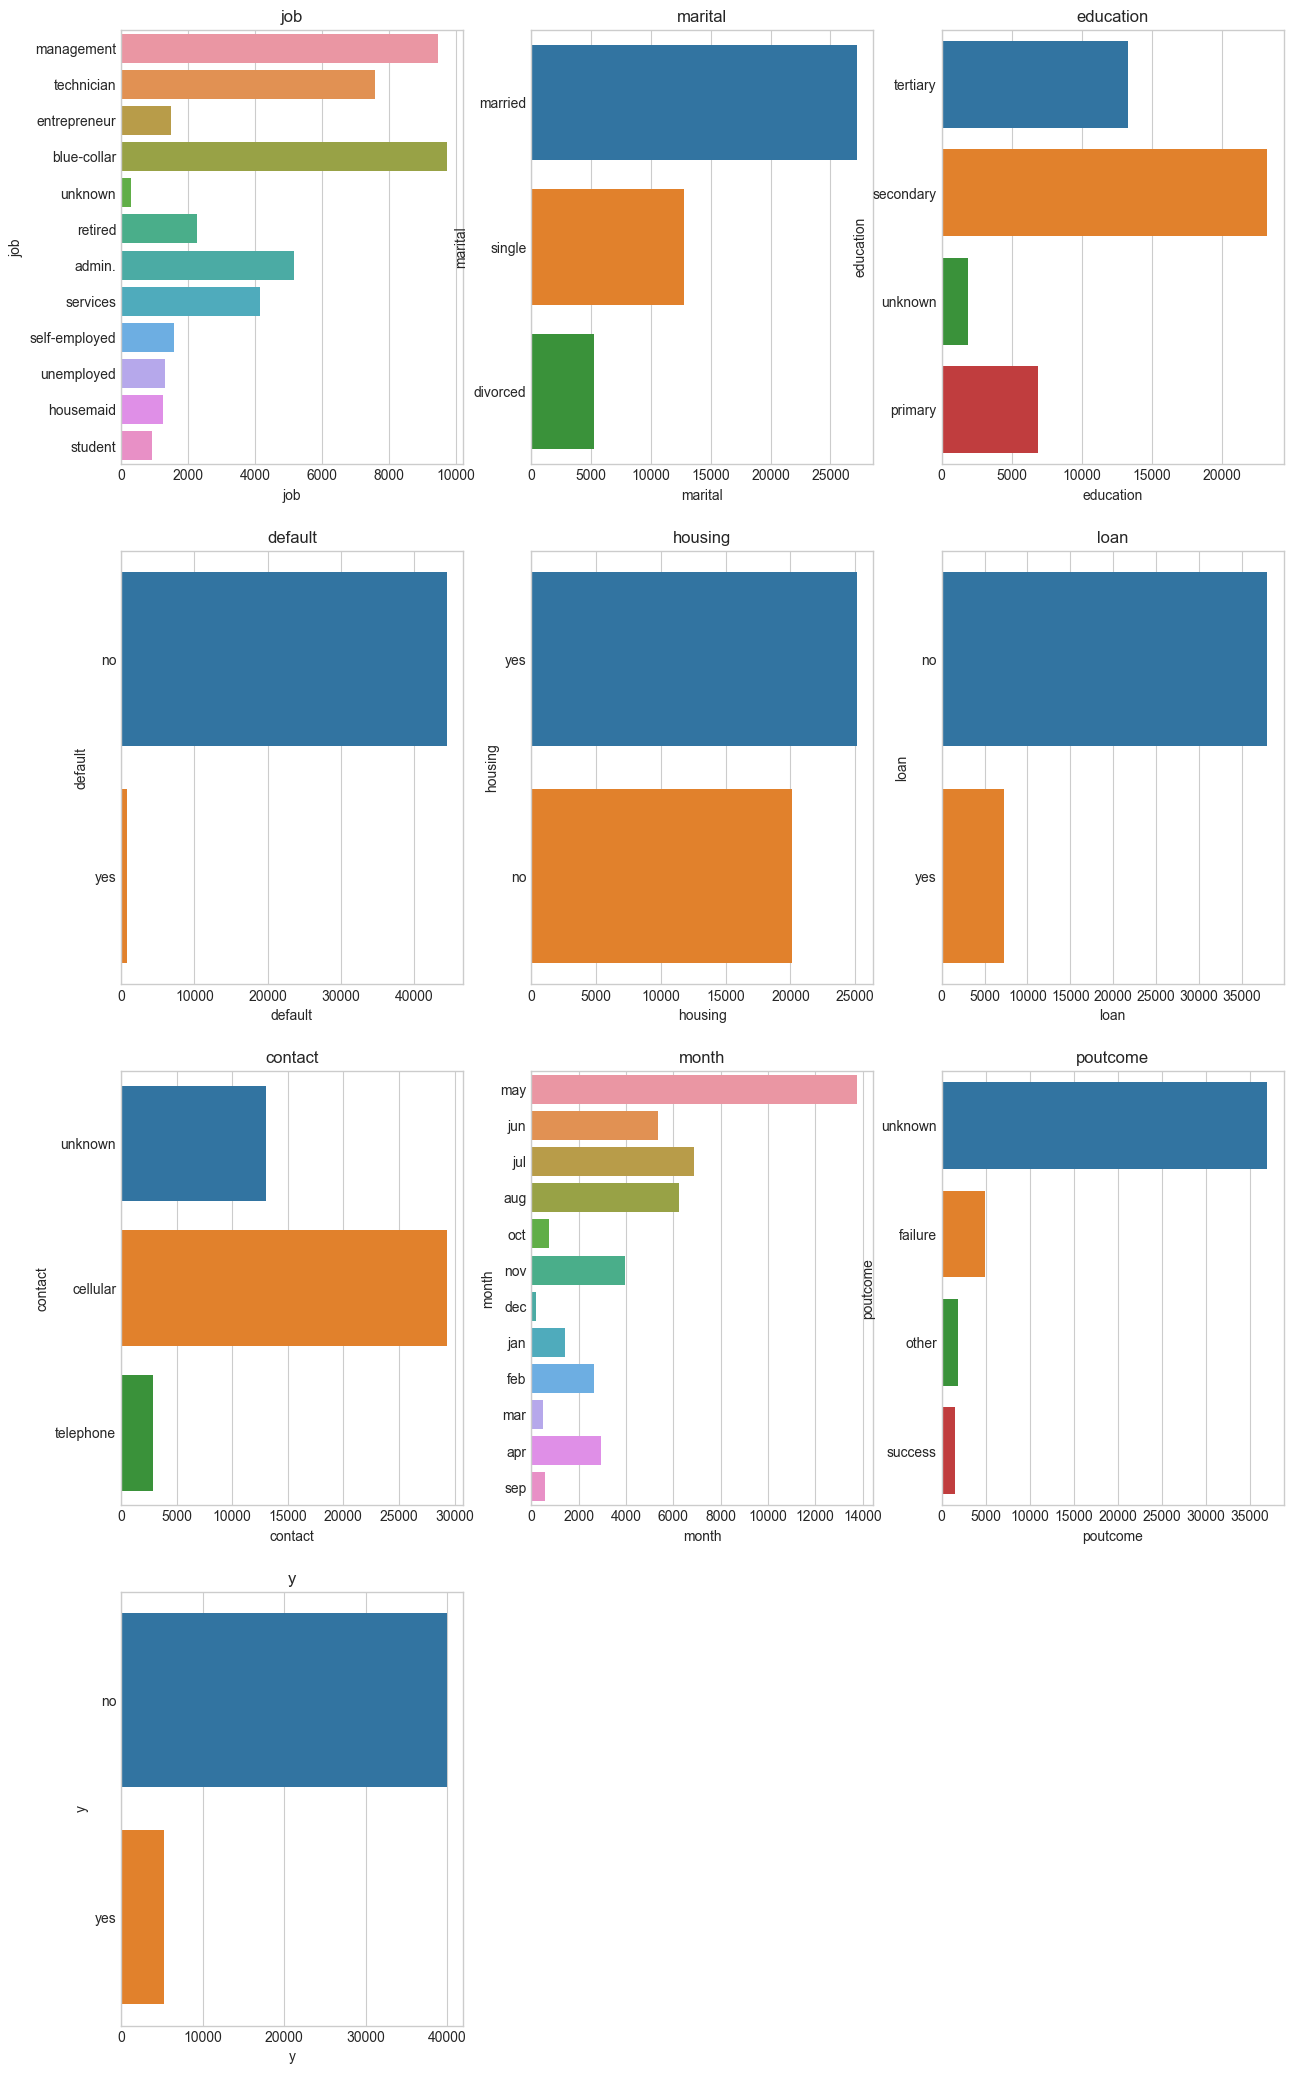

In [19]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cat_features in cat_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_features,data=df)
    plt.xlabel(cat_features)
    plt.title(cat_features)
    plotnumber+=1
plt.show()

In [20]:
corr_matt=df[cont_features].corr()
corr_matt

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

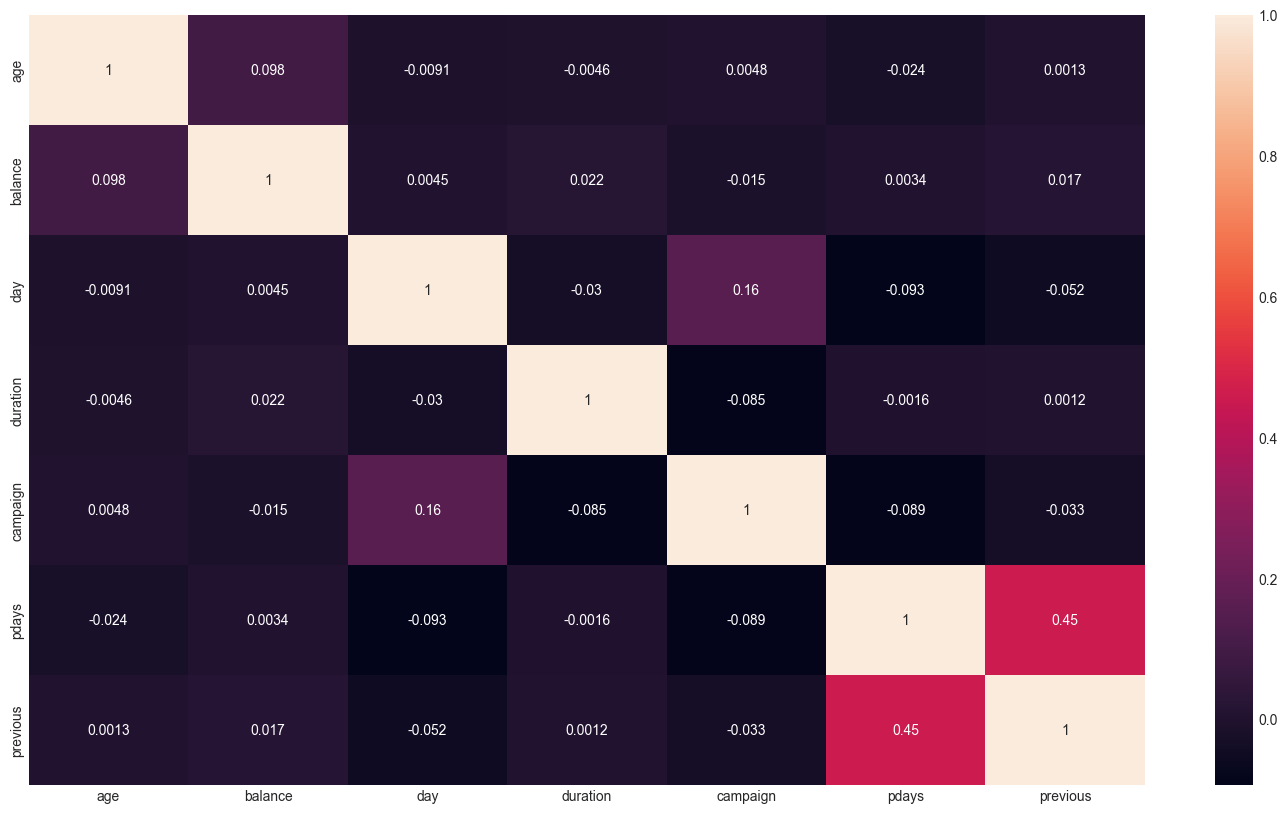

In [21]:
fig = plt.figure(figsize=(18,10))
sns.heatmap(corr_matt,annot=True)

LABEL ENCODING FOR CATEGORICAL VALUES

In [22]:
label_encoding = {
    "y":{"no":0,"yes":1},
    "poutcome":{"unknown":0,"failure":1,"other":2,"success":3},
    "month":{"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11},
    "contact":{"unknown":0,"cellular":1,"telephone":2},
    "loan":{"no":0,"yes":1},
    "housing":{"no":0,"yes":1},
    "default":{"no":0,"yes":1},
    "education":{"tertiary":0,"secondary":1,"unknown":2,"primary":3},
    "marital":{"married":0,"single":1,"divorced":2},   
    "job":{"management":0,"technician":1,"entrepreneur":2,"blue-collar":3,"unknown":4,"retired":5,"admin.":6,"services":7,"self-employed":8,"unemployed":9,"housemaid":10,"student":11}
}

In [23]:
df1 = df.replace(label_encoding)
df1.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,1,0,0,5,4,261,1,-1,0,0,0
1,44,1,1,1,0,29,1,0,0,5,4,151,1,-1,0,0,0
2,33,2,0,1,0,2,1,1,0,5,4,76,1,-1,0,0,0
3,47,3,0,2,0,1506,1,0,0,5,4,92,1,-1,0,0,0
4,33,4,1,2,0,1,0,0,0,5,4,198,1,-1,0,0,0


In [24]:
df2 = df1[cont_features]
df2

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler(feature_range=(0, 1))

df[cont_features] = scaler.fit_transform(df1[cont_features]) 

features = [feat for feat in df.columns if feat !='y']

x = df2[cont_features] # feature set
y = df1['y'] # target

# Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# train and test datasets dimensions
x_train.shape, x_test.shape


((36168, 7), (9043, 7))

OVERSAMPLING

Over sampling is used when the amount of data collected is insufficient.

In [26]:
from collections import Counter
from imblearn.over_sampling import SMOTE
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size= 0.7,random_state=42)
smote=SMOTE()
x_train_os, y_train_os = smote.fit_resample(x_train, y_train)
print("The number of Classes before fit {}".format(Counter(y_train)))
print("The number of Classes after fit {}".format(Counter(y_train_os)))

The number of Classes before fit Counter({0: 27956, 1: 3691})
The number of Classes after fit Counter({0: 27956, 1: 27956})


In [27]:
x_test

,age,balance,day,duration,campaign,pdays,previous
3776,40,580,16,192,1,-1,0
9928,47,3644,9,83,2,-1,0
33409,25,538,20,226,1,-1,0
31885,42,1773,9,311,1,336,1
15738,56,217,21,121,2,-1,0
...,...,...,...,...,...,...,...
9016,46,2800,5,47,1,-1,0
380,38,757,6,133,1,-1,0
7713,41,4539,30,298,3,-1,0
12188,41,1309,20,28,4,-1,0


In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
skfold = StratifiedKFold(n_splits=5)
model = DecisionTreeClassifier(random_state=40)
scores=cross_val_score(model,x_train_os,y_train_os,cv=skfold)
print(np.mean(scores))

0.8440229346249601


DECISION TREE CLASSIFIER

In [29]:
deseciontree_model=DecisionTreeClassifier(max_depth = 10, random_state = 40)
deseciontree_model.fit(x_train_os, y_train_os)
y_predicted_deseciontree = deseciontree_model.predict(x_test)
y_predicted_deseciontree

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
deseciontree_model.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_deseciontree))
print("Precision:",metrics.precision_score(y_test,y_predicted_deseciontree))
print("Recall:",metrics.recall_score(y_test, y_predicted_deseciontree))

Accuracy: 0.8052196992037747
Precision: 0.3425814234016888
Recall: 0.7108886107634543


RANDOM FOREST CLASSIFIER

In [31]:
from sklearn.ensemble import RandomForestClassifier


randomforest_model= RandomForestClassifier(n_estimators = 10)
randomforest_model.fit(x_train_os, y_train_os)
y_predicted_randomforest = randomforest_model.predict(x_test)
y_predicted_randomforest

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
randomforest_model.score(x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_randomforest))
print("Precision:",metrics.precision_score(y_test,y_predicted_randomforest))
print("Recall:",metrics.recall_score(y_test, y_predicted_randomforest))

Accuracy: 0.837805956944854
Precision: 0.3852896341463415
Recall: 0.632665832290363
